# Install important tools

In [ ]:
!pip install pycaret

  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.


In [ ]:
!pip install requests==2.23.0

  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires requests>=2.24.0, but you have requests 2.23.0 which is incompatible.


In [ ]:
!pip install folium==0.2.1

In [ ]:
!pip install --upgrade setuptools

# Prepare Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder

from pycaret.clustering import *
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Supermarket Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CRM/Supermarket Data.csv')
df.head()

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  ...  STORE_CODE  STORE_FORMAT  STORE_REGION
0     200732   20071005             6  ...  STORE00001            LS           E02
1     200733   20071010             4  ...  STORE00001            LS           E02
2     200741   20071209             1  ...  STORE00001            LS           E02
3     200731   20070929             7  ...  STORE00001            LS           E02
4     200737   20071110             7  ...  STORE00001            LS           E02

[5 rows x 22 columns]

# Review Data

In [ ]:
df.head()

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  ...  STORE_CODE  STORE_FORMAT  STORE_REGION
0     200732   20071005             6  ...  STORE00001            LS           E02
1     200733   20071010             4  ...  STORE00001            LS           E02
2     200741   20071209             1  ...  STORE00001            LS           E02
3     200731   20070929             7  ...  STORE00001            LS           E02
4     200737   20071110             7  ...  STORE00001            LS           E02

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 956574 non-null  int64  
 1   SHOP_DATE                 956574 non-null  int64  
 2   SHOP_WEEKDAY              956574 non-null  int64  
 3   SHOP_HOUR                 956574 non-null  int64  
 4   QUANTITY                  956574 non-null  int64  
 5   SPEND                     956574 non-null  float64
 6   PROD_CODE                 956574 non-null  object 
 7   PROD_CODE_10              956574 non-null  object 
 8   PROD_CODE_20              956574 non-null  object 
 9   PROD_CODE_30              956574 non-null  object 
 10  PROD_CODE_40              956574 non-null  object 
 11  CUST_CODE                 802892 non-null  object 
 12  CUST_PRICE_SENSITIVITY    802892 non-null  object 
 13  CUST_LIFESTAGE            697259 non-null  o

<b>note :</b> ไม่มี null เลย แต่จะทำการเปลี่ยนประเภทข้อมูลให้เหมาะสมก่อนการนำไปวิเคราะห์ Clustering ต่อ

# Transform object to datetime type

In [ ]:
#changing columns shop_date from int64 to datetime type

print('before changing type: ',type(df['SHOP_DATE'][0]))

df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

print('after changing type: ',type(df['SHOP_DATE'][0]))

before changing type:  <class 'numpy.int64'>
after changing type:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 956574 non-null  int64         
 1   SHOP_DATE                 956574 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              956574 non-null  int64         
 3   SHOP_HOUR                 956574 non-null  int64         
 4   QUANTITY                  956574 non-null  int64         
 5   SPEND                     956574 non-null  float64       
 6   PROD_CODE                 956574 non-null  object        
 7   PROD_CODE_10              956574 non-null  object        
 8   PROD_CODE_20              956574 non-null  object        
 9   PROD_CODE_30              956574 non-null  object        
 10  PROD_CODE_40              956574 non-null  object        
 11  CUST_CODE                 802892 non-null  object        
 12  CU

# One-Hot for string object.

In [ ]:
##get_dummies for basket size
dummies = pd.get_dummies(df['BASKET_SIZE'])
df[dummies.columns] = dummies
df.tail()

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  ...  STORE_REGION  L  M  S
956569     200617 2006-06-22             5         12  ...           W01  0  1  0
956570     200633 2006-10-13             6         20  ...           W01  1  0  0
956571     200617 2006-06-22             5         18  ...           W01  1  0  0
956572     200619 2006-07-06             5         19  ...           W01  1  0  0
956573     200635 2006-10-23             2         21  ...           W01  1  0  0

[5 rows x 25 columns]

In [ ]:
##get_dummies for basket price sensitivity
dummies2 = pd.get_dummies(df['BASKET_PRICE_SENSITIVITY'])
df[dummies2.columns] = dummies2
df.tail()

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  ...  LA  MM UM XX
956569     200617 2006-06-22             5         12  ...   0   1  0  0
956570     200633 2006-10-13             6         20  ...   1   0  0  0
956571     200617 2006-06-22             5         18  ...   1   0  0  0
956572     200619 2006-07-06             5         19  ...   1   0  0  0
956573     200635 2006-10-23             2         21  ...   0   1  0  0

[5 rows x 29 columns]

# Define Features

เราจะไม่ใช้ทุก columns มาทำการ clustering แต่เราจะเลือก columns ที่สามารถบ่งบอก characteristics บางอย่างได้


Geographical characteristics
- สามารถใช้ STORE_CODE  ได้ในการบอกว่า customer นี้เกิด Transaction ที่ไหน 

Demographical characteristics : ไม่มี

Socioeconomic characteristics : ไม่มี

Behaviour characteristics
- Purchase frequency : Total visit
- Time of purchase : First Date, Last Date
- Purchase Quantity : Basket Size, Spend Per Quantity, Total Spend
- Product rating : TotalSKUs

Psychographic characteristics : ไม่มี

....

...

..

.

.

.




## Geographical characteristics 

In [ ]:
#Geographical characteristics 
t = df[['STORE_CODE', 'STORE_FORMAT', 'STORE_REGION']]
t.head()

STORE_CODE STORE_FORMAT STORE_REGION
0  STORE00001           LS          E02
1  STORE00001           LS          E02
2  STORE00001           LS          E02
3  STORE00001           LS          E02
4  STORE00001           LS          E02

In [ ]:
t.value_counts()

STORE_CODE  STORE_FORMAT  STORE_REGION
STORE00001  LS            E02             578082
STORE00002  LS            W01             378492
dtype: int64

In [ ]:
t[t.STORE_CODE=='STORE00001'].sample(5)

STORE_CODE STORE_FORMAT STORE_REGION
390444  STORE00001           LS          E02
47894   STORE00001           LS          E02
302956  STORE00001           LS          E02
45304   STORE00001           LS          E02
531846  STORE00001           LS          E02

In [ ]:
t[t.STORE_CODE=='STORE00002'].sample(5)

STORE_CODE STORE_FORMAT STORE_REGION
586547  STORE00002           LS          W01
612996  STORE00002           LS          W01
602988  STORE00002           LS          W01
897992  STORE00002           LS          W01
946089  STORE00002           LS          W01

<b>note</b> : จะเห็นว่า ทั้ง 3 columns ที่บอกเกี่ยวกับ Geographical characteristics 

- STORE_FORMAT มีแค่ LS ไม่มี information อะไร

- STORE_CODE และ STORE_REGION นั้นจะสัมพันธ์กัน เช่น ถ้า STORE00001 จะได้ E02 ส่วน STORE00002 จะได้ W01 เพราะฉะนั้นใช้ column เดียวก็สามารถอิงไปยังอีก column ได้

เพราะฉะนั้น เลือกมาใช้แค่ columns เดียว STORE_CODE หรือ STORE_REGION ก็ได้ ส่วน STORE_FORMAT สามารถ drop ได้

In [ ]:
df.drop('STORE_FORMAT', axis='columns', inplace=True)
df.head(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  ...  S LA MM UM XX
0     200732 2007-10-05             6         17         3  ...  0  0  1  0  0
1     200733 2007-10-10             4         20         3  ...  0  0  1  0  0
2     200741 2007-12-09             1         11         1  ...  0  0  1  0  0
3     200731 2007-09-29             7         17         1  ...  0  1  0  0  0
4     200737 2007-11-10             7         14         3  ...  0  0  1  0  0

[5 rows x 28 columns]

## Behaviour characteristics

In [ ]:
# Behaviour characteristics
# - Purchase frequency : Total visit, Total days, Recency
# - Time of purchase : First Date, Last Date
# - Purchase Quantity : Basket Size, Spend Per Quantity, Total Spend, Ticket Size
# - Product rating : TotalSKUs


#create columns SpendPerQuantity
df['SpendPerQuantity'] = df['SPEND']/df['QUANTITY']

##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  SpendPerQuan=('SpendPerQuantity', 'mean'),
                                                                                  Basket_size_L=('L', 'sum'),
                                                                                  Basket_size_M=('M', 'sum'),
                                                                                  Basket_size_S=('S', 'sum')                                                                         
                                                                                  ).reset_index()

##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

##find max date in the dataset
max_date = df_csv['LastDate'].max()

##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

df_csv.head()

CUST_CODE  TotalSpend  TotalVisits  ...  TicketSize total_days recency
0  CUST0000000181        2.44            1  ...    2.440000          1     547
1  CUST0000000369      959.33          220  ...    4.360591        812       1
2  CUST0000000689      328.57           16  ...   20.535625        338      13
3  CUST0000000998        5.95            3  ...    1.983333         65     730
4  CUST0000001163       39.74            4  ...    9.935000        610      14

[5 rows x 13 columns]

In [ ]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUST_CODE      6100 non-null   object        
 1   TotalSpend     6100 non-null   float64       
 2   TotalVisits    6100 non-null   int64         
 3   TotalSKUs      6100 non-null   int64         
 4   FirstDate      6100 non-null   datetime64[ns]
 5   LastDate       6100 non-null   datetime64[ns]
 6   SpendPerQuan   6100 non-null   float64       
 7   Basket_size_L  6100 non-null   float64       
 8   Basket_size_M  6100 non-null   float64       
 9   Basket_size_S  6100 non-null   float64       
 10  TicketSize     6100 non-null   float64       
 11  total_days     6100 non-null   int64         
 12  recency        6100 non-null   int64         
dtypes: datetime64[ns](2), float64(6), int64(4), object(1)
memory usage: 619.7+ KB


<b>note</b> : เราจะเก็บ df_csv ไว้เป็น master และทำการ สร้าง temp_table ใหม่ ที่ทำการ drop CUST_CODE ออกไปแล้ว

หรือถ้าเราใช้ pycaret เราสามารถกำหนดได้ว่าเราจะไม่เอา columns อะไร

# Set up Data

In [ ]:
#กำหนด ignor_features สำหรับ columns ที่เราไม่ต้องการ
#ทำการ Normalize ข้อมูลก่อนจะ operate

exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

Description                 Value
0                               session_id                  8349
1                            Original Data            (6100, 13)
2                           Missing Values                 False
3                         Numeric Features                    10
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (6100, 10)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  a7f7
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

# Create Model

<b>note</b> : เราจะทำการ clustering คำถามคือเราจะใช้ model ไหน ในการ clustering ข้อมูล Behaviour Characteristics ที่เราเตรียมไว้ เพราะฉะนั้นเราจะทำการ Compare Performance Model

In [ ]:
#models ที่เป็นตัวเลือกของเรา based on Scikit-Learn
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [ ]:
#method ในการหา Performance ของ models
get_metrics()

Name       Display Name  ... Needs Ground Truth Custom
ID                                                 ...                          
silhouette          Silhouette         Silhouette  ...              False  False
chs          Calinski-Harabasz  Calinski-Harabasz  ...              False  False
db              Davies-Bouldin     Davies-Bouldin  ...              False  False
hs           Homogeneity Score        Homogeneity  ...               True  False
ari                 Rand Index         Rand Index  ...               True  False
cs          Completeness Score       Completeness  ...               True  False

[6 rows x 9 columns]

In [ ]:
#compare model performance (1)

#keep performance-score in metrics

metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0     -0.1455            46.4642  ...           0             0

[1 rows x 6 columns]

In [ ]:
##compare model performance (2)

#create performace table and display

cluster_metrics = pd.concat(metrics)

cluster_metrics.set_index("model", 
                          inplace=True)

cluster_metrics.sort_values(by='Silhouette', 
                            ascending=False, 
                            inplace=True)

cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], 
                                    color = 'green', axis = 0).highlight_min(
                                        subset=['Davies-Bouldin'], 
                                        color = 'green', 
                                        axis = 0)
                                    

<b>note</b>: จะเห็นว่า มี 3 models ที่แตกต่างกันที่แนะนำจากแต่ละตัววัด Performance เราจะเลือก model ชื่อ Spectral Clustering (sc), K-means และ ap

### Spectral Clustering

In [ ]:
#create model
sc = create_model('sc')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.8454            69.0474  ...           0             0

[1 rows x 6 columns]

In [ ]:
plot_model(sc)

<b>note</b> : จะเห็นได้ว่า model แบ่งได้ไม่ค่อยดีเท่าไหร่ เมื่อเอา PCA1 และ PCA2 มา plot ดูการ cluster ของข้อมูล model ตัดสินข้อมูลเกือบทั้งหมดเป็น cluster 0

### K-means Clustering

In [ ]:
#create model
kmean = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.3472          2552.4627  ...           0             0

[1 rows x 6 columns]

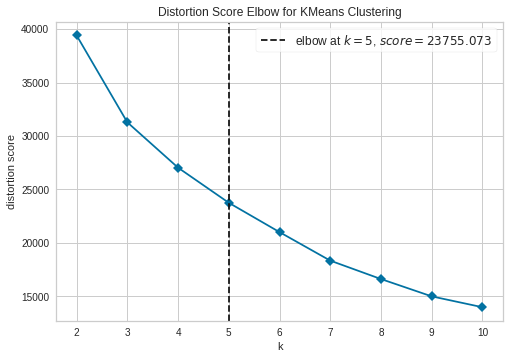

In [ ]:
plot_model(kmean, plot='elbow')

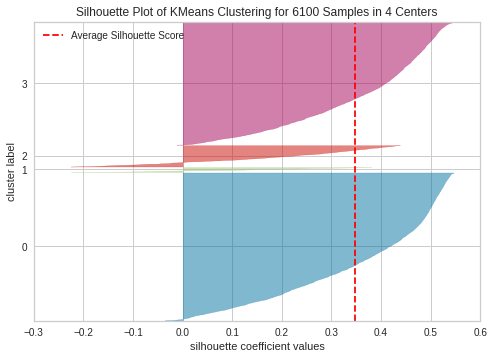

In [ ]:
plot_model(kmean, plot='silhouette')

<b>note</b> : ด้วยวิธี K-mean จะเห็นได้ว่า elbow แนะนำ k=5 แต่ silhouette แนะนำ k=4 ถึงจะเหมาะสม เราจะลองทำดูทั้งสองค่า

In [ ]:
#เอาตามวิธี Elbow (k=5)
kmean_5 = create_model('kmeans', num_clusters=5)
plot_model(kmean_5)

In [ ]:
#เอาตามวิธี Silhouette (k=4)
plot_model(kmean)

<b>note</b> : เราจะเห็นว่าเลือก k-clusters ตามวิธี Silhouette ข้อมูลแต่ละ clusters มีการ overlap น้อยกว่าเลือกค่า k-clusters ตามวิธี Elbow

### Affinity Propagation

In [ ]:
ap = create_model('ap')
plot_model(ap)

<b>note</b> : จะเห็นว่าวิธีที่แบ่งดีที่สุดในที่นี้คือ  K-mean clustering และ จำนวน cluster เท่ากับ 4 clusters

# Determined Clusters

In [ ]:
kmean_4 = create_model('kmeans', num_clusters=4)
kmean_4_df = assign_model(kmean_4)

#transfrom cluster object to int label
enc = LabelEncoder()
label = enc.fit_transform(kmean_4_df[kmean_4_df.columns[-1]])
kmean_4_df['label'] = label

kmean_4_df.head()

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.3472          2552.4627  ...           0             0

[1 rows x 6 columns]

CUST_CODE  TotalSpend  TotalVisits  ...  recency    Cluster label
0  CUST0000000181        2.44            1  ...      547  Cluster 0     0
1  CUST0000000369      959.33          220  ...        1  Cluster 1     1
2  CUST0000000689      328.57           16  ...       13  Cluster 3     3
3  CUST0000000998        5.95            3  ...      730  Cluster 0     0
4  CUST0000001163       39.74            4  ...       14  Cluster 3     3

[5 rows x 15 columns]

## Total_Visit vs Total_Spend

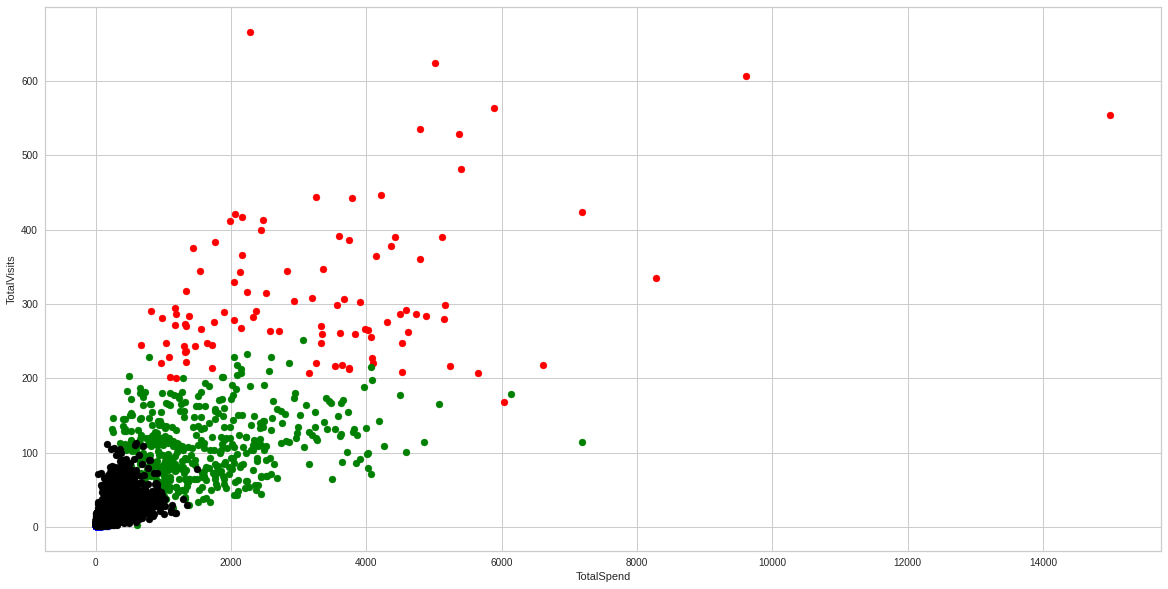

In [ ]:
#prepare each clusters
cluster_0 = kmean_4_df[kmean_4_df['label']==0]
cluster_1 = kmean_4_df[kmean_4_df['label']==1]
cluster_2 = kmean_4_df[kmean_4_df['label']==2]
cluster_3 = kmean_4_df[kmean_4_df['label']==3]


#plot TotalSpend vs TotalVisit
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

ax.scatter(cluster_0.TotalSpend, cluster_0.TotalVisits, c='blue')
ax.scatter(cluster_1.TotalSpend, cluster_1.TotalVisits, c='red')
ax.scatter(cluster_2.TotalSpend, cluster_2.TotalVisits, c='green')
ax.scatter(cluster_3.TotalSpend, cluster_3.TotalVisits, c='black')

plt.xlabel('TotalSpend')
plt.ylabel('TotalVisits')
plt.show()

<b>note</b> : เมื่อทำการ plot TotalSpend กับ TotalVisits กับ clusters ทั้ง 4 กลุ่ม พบว่า 

- cluster_0 : เป็นกลุ่มที่มีการ spend น้อย และ visit น้อย (เป็นกลุ่มที่สีดำทับอยู่ สามารถ comment out สีดำออก จะเห็น cluster_0) อาจจะเป็นลูกค้าที่ไม่ได้ใช้จ่ายในร้านค้าเยอะ (ขาจร)

- cluster_1 : เป็นกลุ่มที่มีการ Spend ค่อนข้างสูง และมีการ visit บ่อยเป็นลูกค้าประจำที่มีกำลังจ่ายสูง ควรจะรักษาลูกค้ากลุ่มนี้ไว้ (VIP)

- cluster_2 : เป็นกลุ่มที่มีการ Spend สูงพอๆกับ cluster_1 แต่ว่ามีการ visit ไม่บ่อยเท่า cluster_1 ลูกค้ากลุ่มนี้เป็นกลุ่มที่มาไม่บล่อยแต่มีกำลังซื้อสูง เราควรทำให้กลุ่มนี้มาบ่อยขึ้น โดยอาจทำการยิง Advertise กับ Promotion ไปยังลูกค้ากลุ่มนี้ อาจจะเป็นลูกค้าที่มาตามเทศกาล หรือ seasonal (Seasonal)

- cluster_3 : เป็น cluster ที่มีการ visit และ spend เป็นรอง cluster_1 กับ 2 แต่การ spend และ visit สูงกว่า cluster_0 กลุ่มนี้เป็นกลุ่มที่ควรทำ up-selling เพื่อให้ TotalSpend สูงขึ้น หรืออาจมีการยิง Promotion ไปยังลูกค้ากลุ่มนี้ (High-potential)

## Basket Size

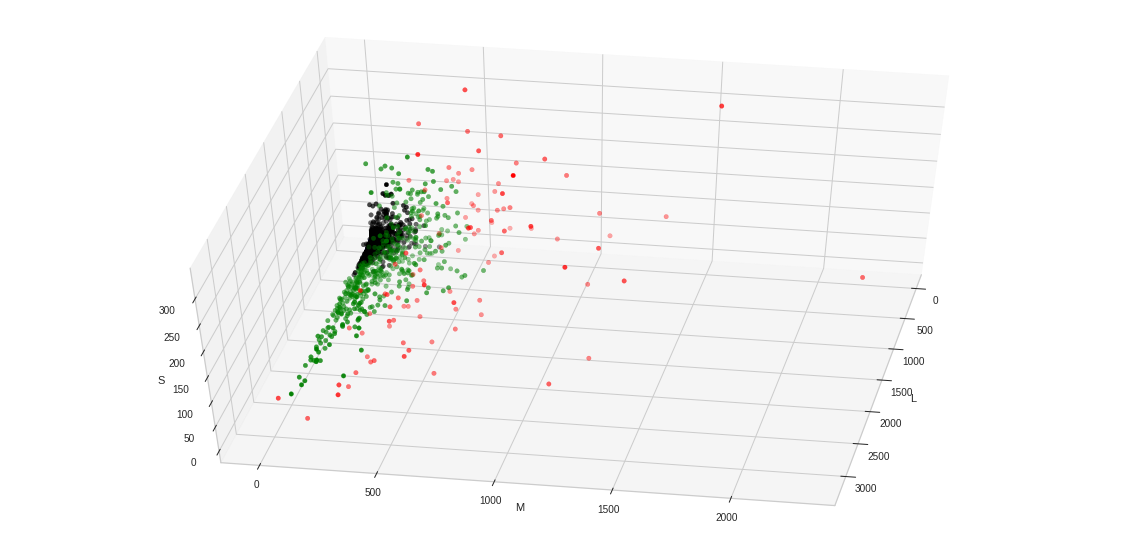

In [ ]:
#plot basket size 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_0.Basket_size_L, cluster_0.Basket_size_M, cluster_0.Basket_size_S, c='blue')
ax.scatter(cluster_1.Basket_size_L, cluster_1.Basket_size_M, cluster_1.Basket_size_S, c='red')
ax.scatter(cluster_2.Basket_size_L, cluster_2.Basket_size_M, cluster_2.Basket_size_S, c='green')
ax.scatter(cluster_3.Basket_size_L, cluster_3.Basket_size_M, cluster_3.Basket_size_S, c='black')
ax.view_init(50, 10)

plt.xlabel('L')
plt.ylabel('M')
ax.set_zlabel('S')

plt.show()

<b>note</b> : เมื่อทำการ plot Basket size กับ clusters ทั้ง 4 กลุ่ม พบว่า 

- cluster_0 : ลูกค้ากลุ่มนี้ basket size ใหญ่ แต่มาไม่บ่อย (ขาจร)

- cluster_1 : ลูกค้ากลุ่มนี้ basket size มักจะเป็น size L ส่วนใหญ่ (VIP)

- cluster_2 : ลูกค้ากลุ่มนี้มี Basket size L ส่วนใหญ่ (Seasonal)

- cluster_3 : ลูกค้ากลุ่มนี้ basket size L ส่วนใหญ่ และมาค่อนข้างปานกลาง มีโอกาสที่กลุ่มนี้ พัฒนาไปเป็น cluster_2 ได้ (high-potential)